## Minimal notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests

import seaborn as sns

from collections import Counter
import itertools

from matplotlib.colors import LogNorm, SymLogNorm, Normalize
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/manuelmorales/miniconda3/envs/training/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import database

In [2]:
# always use False
LOCAL = False

if LOCAL:
    f = open('data/inspire_LA.json','r')
    df = json.load(f)
    f.close()
else:
    r = requests.get('https://github.com/restrepo/inspireauth/raw/main/data/inspire_LA.json')
    df = r.json()

db_master = pd.DataFrame(df)
db_master.head()

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender
0,H.Albrecht.1,Venezuela,"[{'value': 'hartwig.albrecht@desy.de', 'curren...","Albrecht, Hermann","[{'value': 'H.Albrecht.1', 'schema': 'INSPIRE ...","Unlisted, VE",912061,"{'value': 'Albrecht, Hartwig', 'preferred_name...","[{'recid': 2023395, 'year': '2021', 'citation_...",[{'record': {'$ref': 'https://inspirehep.net/a...,1018731,[],male
1,D.M.B.R.1,Venezuela,None,"Bellorin, David","[{'value': 'D.M.B.R.1', 'schema': 'INSPIRE BAI'}]","Unlisted, VE",912061,"{'value': 'R., David M. Bellorin'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023397,[],male
2,D.F.Mundarain.1,Chile,None,"Mundarain, Douglas F.","[{'value': 'D.F.Mundarain.1', 'schema': 'INSPI...",Catolica del Norte U.,908143,"{'value': 'Mundarain, Douglas F.'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023398,[],male
3,R.Gaitan.2,Venezuela,"[{'value': 'rgaitan@uc.edu.ve', 'current': Fal...","Dominguez, Yessica","[{'value': 'R.Gaitan.2', 'schema': 'INSPIRE BA...","Unlisted, VE",912061,"{'value': 'Gaitan, Rolando', 'preferred_name':...","[{'recid': 1863076, 'year': '2021', 'citation_...","[{'rank': 'PHD', 'record': {'$ref': 'https://i...",1864347,[],male
4,J.Ntahompagaze.1,Rwanda,None,"Ntahompagaze, Joseph","[{'value': 'J.Ntahompagaze.1', 'schema': 'INSP...","EAIFR, Kigali",1636656,"{'value': 'Ntahompagaze, Joseph'}","[{'recid': 2087212, 'year': '2022', 'citation_...",None,2087213,[],male


In [3]:
db_master.shape

(57588, 13)

# All countries in the database

In [4]:
# find all countries in json
all_countries = db_master['country'].unique()
# get rid of Nonetypes in the database
all_countries = [country for country in all_countries if country is not None]
# sort countries 
all_countries.sort()

print(len(all_countries))

for country in all_countries:
    print(country)
    
# format country 
def format_country(country):
    country = country.lower()
    ans = country.replace(" ", "_")
    return ans

115
Algeria
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei Darussalam
Bulgaria
Canada
Chile
China
Colombia
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Georgia
Germany
Ghana
Greece
Guatemala
Holy See (Vatican City State)
Honduras
Hungary
Iceland
India
Indonesia
Iran, Islamic Republic of
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Korea, Republic of
Kuwait
Kyrgyzstan
Latvia
Lebanon
Lithuania
Luxembourg
Madagascar
Malaysia
Malta
Mexico
Moldova
Mongolia
Montenegro
Morocco
Netherlands
New Zealand
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Palestine, State of
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Romania
Russian Federation
Rwanda
Saudi Arabia
Serbia and Montenegro
Singapore
Slovakia
Slovenia
South Africa
Spain
Sri Lanka
Sweden
Switzerland
Syrian Arab Republic
Taiwan

# Latin American countries 

In [5]:
# 19 Latin American countries indexed in the database
LA_countries = [
    'Argentina',
    'Bolivia',
    'Brazil',
    'Chile',
    'Colombia',
    'Costa Rica',
    'Cuba',
    'Dominican Republic', # new
    'Ecuador',
    'El Salvador', # new
    'Guatemala',
    'Honduras',
    'Mexico',
    'Panama', # new
    'Paraguay',
    'Peru',
    'Puerto Rico', # new
    'Uruguay',
    'Venezuela'
]

# Jamaica, Bahamas not included. 

LA_countries_format = [format_country(country) for country in LA_countries]

In [6]:
db=db_master[db_master['country']=='Chile'].reset_index(drop=True)
db.head()

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender
0,D.F.Mundarain.1,Chile,None,"Mundarain, Douglas F.","[{'value': 'D.F.Mundarain.1', 'schema': 'INSPI...",Catolica del Norte U.,908143,"{'value': 'Mundarain, Douglas F.'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023398,[],male
1,M.P.Garcia.del.Moral.1,Chile,"[{'value': 'maria.garciadelmoral@uantof.cl', '...","Garcia del Moral, Maria Pilar","[{'value': '0000-0002-3329-2391', 'schema': 'O...",Antofagasta U.,907784,"{'value': 'Garcia del Moral Zabala, Maria del ...","[{'recid': 781916, 'year': '2008', 'citation_c...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",1019914,"[{'ids': [{'value': 'INSPIRE-00666347', 'schem...",female
2,A.Restuccia.1,Chile,"[{'value': 'arestu@usb.ve', 'current': True}]","Restuccia, Alvaro","[{'value': 'A.Restuccia.1', 'schema': 'INSPIRE...",Antofagasta U.,907784,"{'value': 'Restuccia, Alvaro', 'preferred_name...","[{'recid': 781916, 'year': '2008', 'citation_c...",[{'record': {'$ref': 'https://inspirehep.net/a...,991923,"[{'ids': [{'value': 'INSPIRE-00130868', 'schem...",male
3,C.Las.Heras.1,Chile,None,"Las Heras, C.","[{'value': 'C.Las.Heras.1', 'schema': 'INSPIRE...",Antofagasta U.,907784,"{'value': 'las Heras Gouverneur, Camilo', 'nam...","[{'recid': 1602193, 'year': '2018', 'citation_...","[{'rank': 'PHD', 'hidden': False, 'record': {'...",1834568,"[{'ids': [{'value': 'INSPIRE-00056546', 'schem...",male
4,P.D.Alvarez.1,Chile,"[{'value': 'pd.alvarez.n@gmail.com', 'current'...","Alvarez, Pedro D.","[{'value': '0000-0001-8757-1700', 'schema': 'O...",Antofagasta U.,907784,"{'value': 'Alvarez, Pedro Diego', 'preferred_n...","[{'recid': 1859189, 'year': '2022', 'citation_...","[{'rank': 'POSTDOC', 'record': {'$ref': 'https...",1051781,"[{'ids': [{'value': 'INSPIRE-00328995', 'schem...",male


# Import functions from the INSPIREHEP_new_publications notebook

In [7]:
# get list of papers

def calculate_papers(country):
    """
    docs
    """
    # df with only the rows of the country
    db_country = db_master[db_master['country']==country].reset_index(drop=True)
    # select list of institutions of the given country
    inst_list = db_country['institution_id'].drop_duplicates().to_list()
    # define the list of dictionaries
    list_of_dicts = np.concatenate(db_country['papers'].values)
    
    # create a set to keep track of unique 'recid' values
    unique_recid_values = set()
    # create a new list to store the dictionaries with unique 'recid' values
    unique_dicts_list = []
    # create a list to store the indices of non-unique elements
    non_unique_indices = []
    # loop through the list of dictionaries and track the indices
    for index, d in enumerate(list_of_dicts):
        recid_value = d['recid']
        # check if the 'a' value is not already in the set (not a duplicate)
        if recid_value not in unique_recid_values:
            # if not, add it to the set and add the dictionary to the new list
            unique_recid_values.add(recid_value)
            unique_dicts_list.append(d)
        else:
            # if it's a duplicate, add the index to the non_unique_indices list
            non_unique_indices.append(index)
    
    # notice the typo in `instituion` in what follows
    filtered_list_of_dicts = [item for item in list_of_dicts if item['institution_id'] in inst_list]
    
    seen_recids = set()
    filtered_data = []

    for item in filtered_list_of_dicts:
        if item['recid'] not in seen_recids:
            filtered_data.append(item)
            seen_recids.add(item['recid'])
    
    
    #return len(filtered_data)
    return filtered_data

In [8]:
def count_shared_recids(data1, data2):
    """
    Count the number of elements with shared 'recid' values between two data structures.

    Parameters:
        data1 (list): First list of dictionaries, each containing an 'recid' key.
        data2 (list): Second list of dictionaries, each containing an 'recid' key.

    Returns:
        int: Count of shared 'recid' values.
    """
    # Extract `recid` values from each data structure
    recid_data1 = {item['recid'] for item in data1}
    recid_data2 = {item['recid'] for item in data2}

    # Find the intersection of both sets
    shared_recids = recid_data1.intersection(recid_data2)

    # Return the count of shared recids
    return len(shared_recids)

# Test cases
empty_list = []
chile_list = calculate_papers('Chile')
argentina_list = calculate_papers('Argentina')

assert count_shared_recids(chile_list, chile_list) == len(chile_list), "Test 1 failed."
assert count_shared_recids(chile_list, argentina_list) == count_shared_recids(argentina_list, chile_list), "Test 2 failed."
assert count_shared_recids(empty_list, chile_list) == 0, "Test 3 failed."

print("Tests passed!")

Tests passed!


In [9]:
def all_shared_papers(country):
    """ docs
    """
    #other_countries = LA_countries[LA_countries != a_country]
    country_list = calculate_papers(country)
    ans = [count_shared_recids(country_list, calculate_papers(la_country)) for la_country in LA_countries]
    return ans

In [10]:
def shared_papers_matrix():
    #other_countries = LA_countries[LA_countries != a_country]
    #for country in LA_:
        #print(f'Papers {a_country}/{country} : {shared_papers(a_country, country)}')
    ans = [all_shared_papers(country) for country in LA_countries]
    return ans

collab_matrix = shared_papers_matrix()

In [93]:
def normalised_shared_papers_matrix():
    """
    Calculate a normalised matrix of shared papers as a percentage, where each cell is divided
    by the maximum value of its row, representing the total papers produced by each country
    with itself.
    
    Returns:
        list of lists: A matrix where each cell is the percentage of shared papers normalised by the row max,
                       rounded to two decimal places.
    """
    # First, generate the collaboration matrix without normalisation
    raw_collab_matrix = shared_papers_matrix()
    
    # Normalise each row by dividing each cell by the max of its row and round to two decimal places
    normalised_matrix = []
    for row in raw_collab_matrix:
        max_value = max(row)  # The maximum value in the row (self-collaboration)
        normalised_row = [round((cell / max_value) * 100, 1) if max_value != 0 else 0 for cell in row]
        normalised_matrix.append(normalised_row)
    
    return normalised_matrix

normalised_collab_matrix = normalised_shared_papers_matrix()



# Generating the plots

In [99]:
def gen_collab_matrix_plot(collab_matrix, scale='symlog', name="collab_matrix"):
    """
    Generate a heatmap of the collaboration matrix with an option to use a symlog or linear color scale.

    Parameters:
        collab_matrix (list of lists): Collaboration matrix data to plot.
        scale (str): 'symlog' for symmetric log scale or 'linear' for linear scale (default is 'symlog').

    Returns:
        None
    """

    fig, ax = plt.subplots(figsize=(21, 21))  # Sample figsize in inches
    ax.xaxis.tick_top()  # x axis on top

    # Choose color normalization based on scale parameter
    if scale == 'symlog':
        norm = SymLogNorm(linthresh=1)
    elif scale == 'linear':
        norm = Normalize()
    else:
        raise ValueError("scale parameter must be either 'symlog' or 'linear'")

    # Generate heatmap with the chosen normalization
    ax = sns.heatmap(collab_matrix, annot=True, fmt='.5g', cmap='Blues', norm=norm,
                     linewidths=.5, annot_kws={"size": 14}, square=True, cbar_kws={"shrink": 0.82})
    
    ax.collections[0].colorbar.ax.tick_params(labelsize=15)

    # Set labels for axes
    ax.set_xticklabels(LA_countries, rotation=80, fontsize=14)
    ax.set_yticklabels(LA_countries, rotation='horizontal', fontsize=14)

    # Save the figure if needed
    fig.savefig(f"../figures/collaborations/{name}.pdf", dpi=150, bbox_inches='tight')


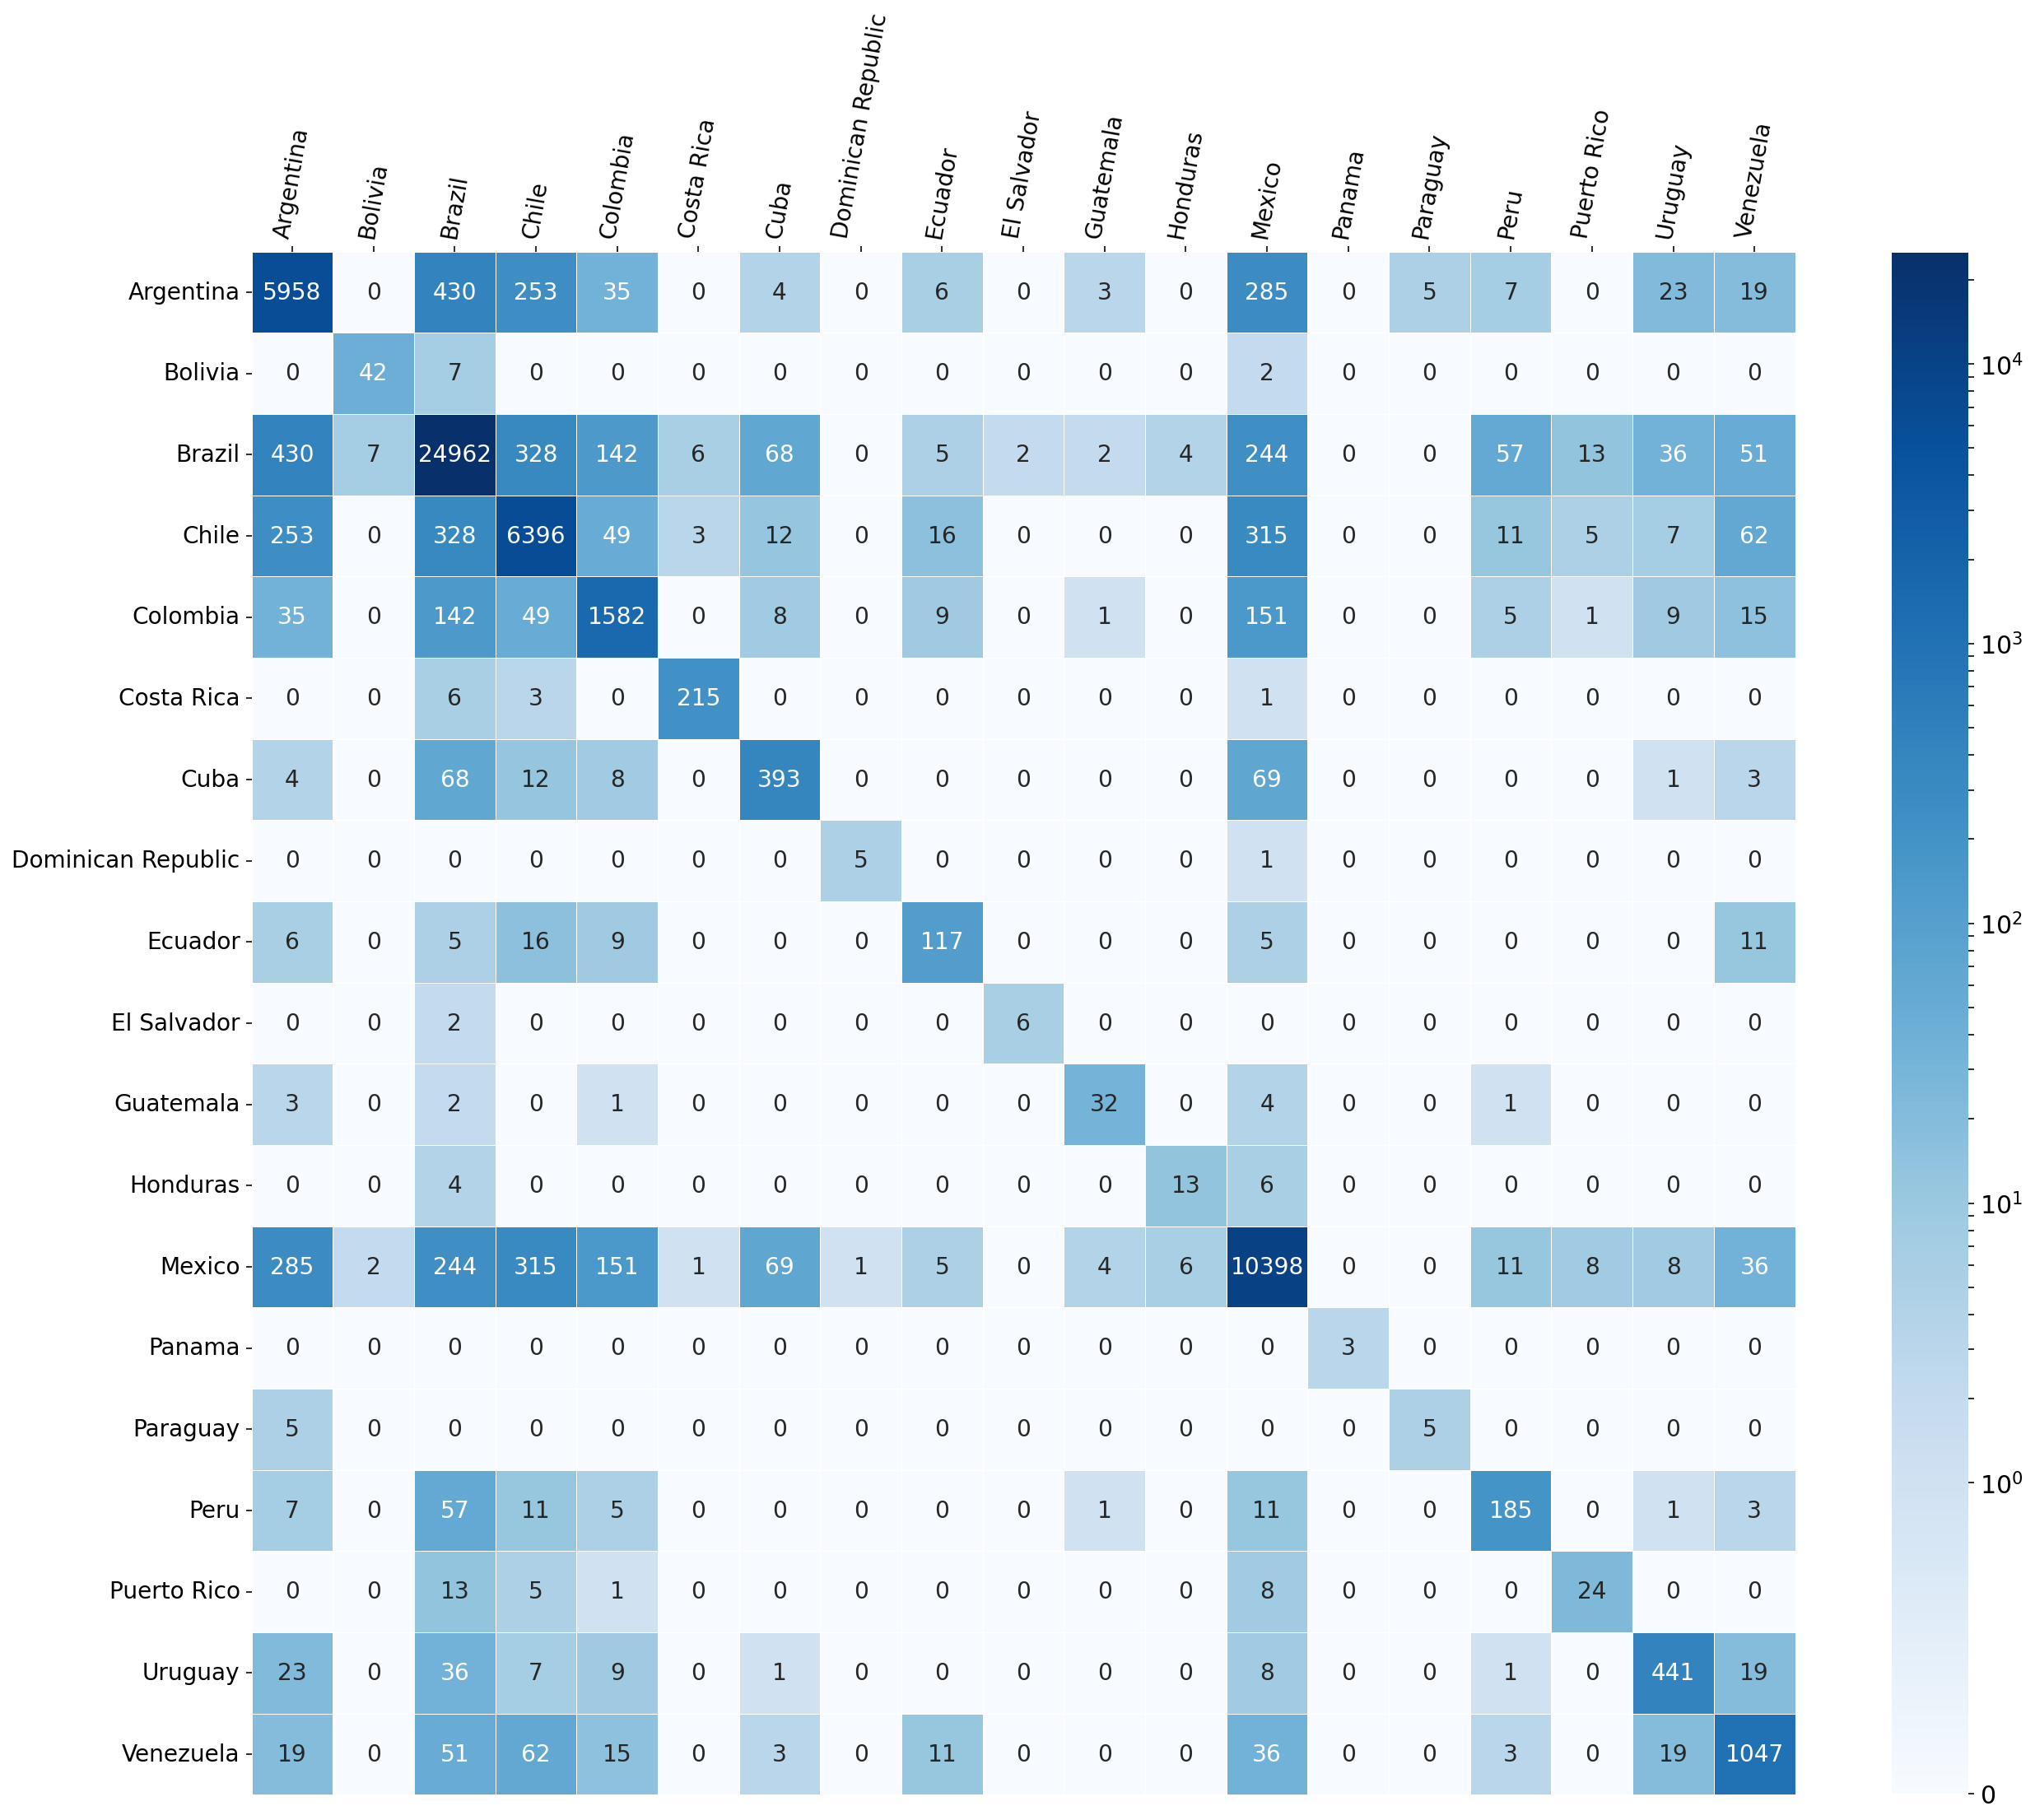

In [101]:
# Absolute value matrix
gen_collab_matrix_plot(collab_matrix, scale="symlog", name="collab_matrix")

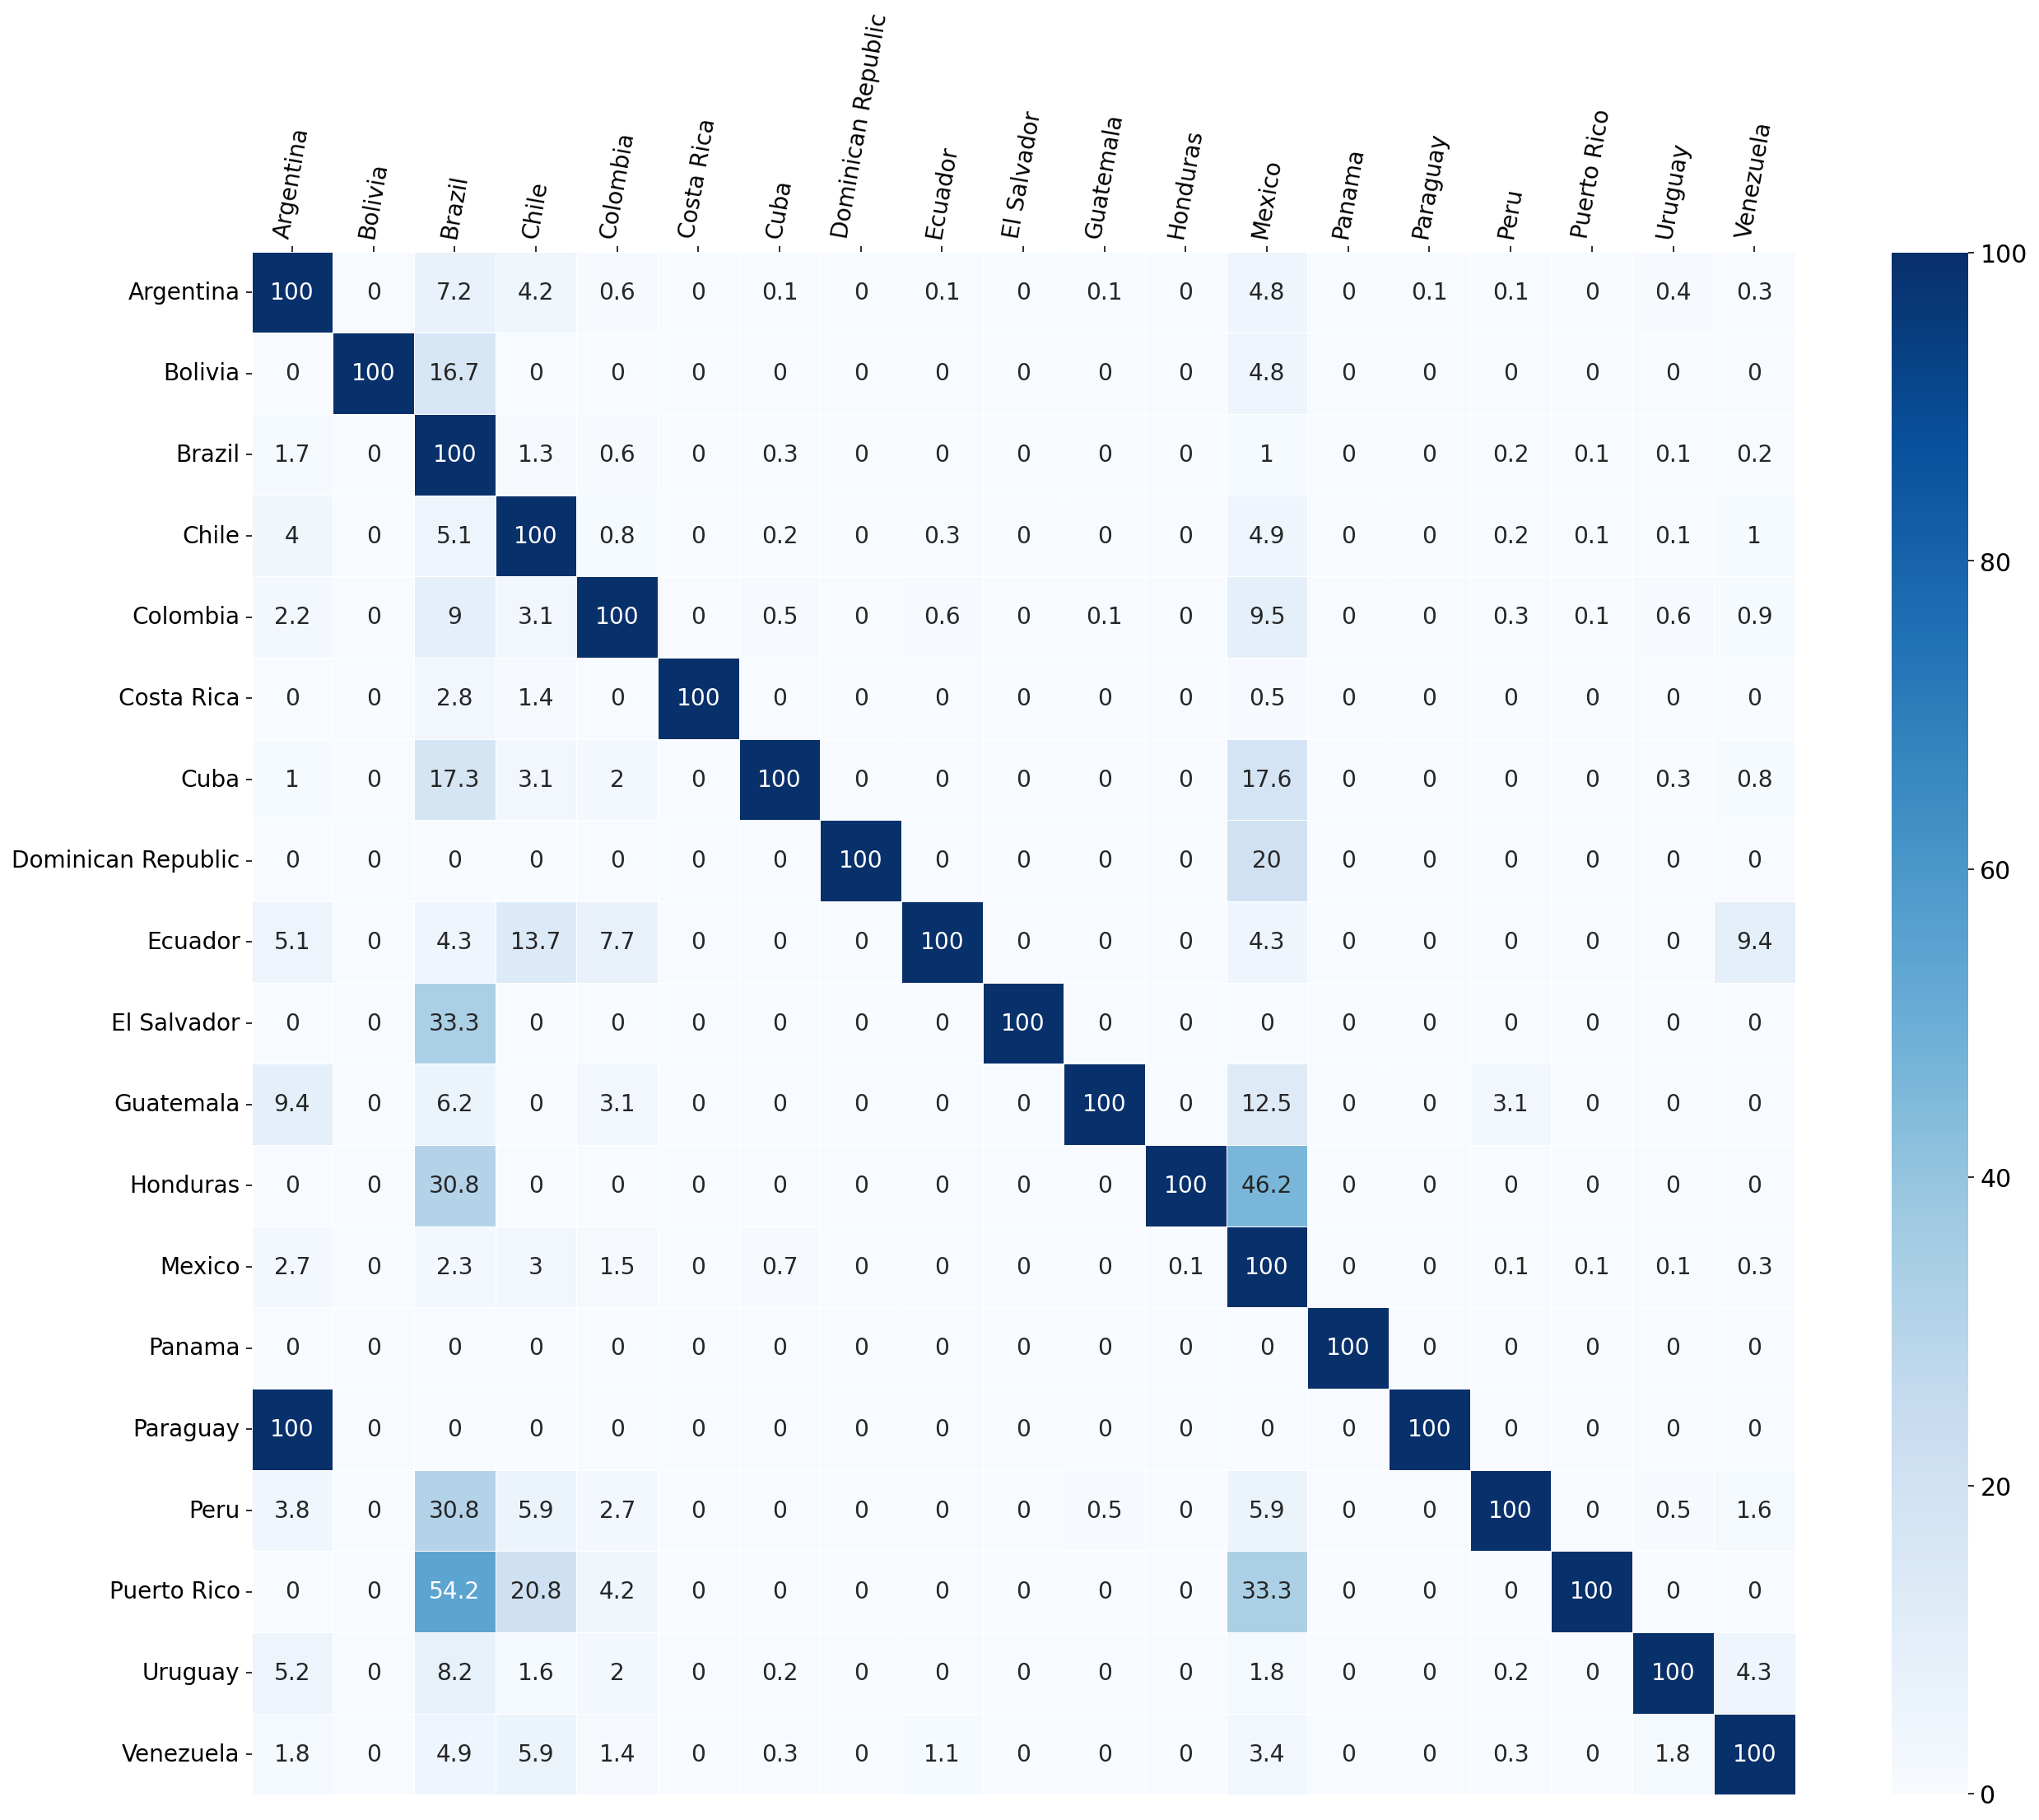

In [102]:
gen_collab_matrix_plot(normalised_collab_matrix, scale="linear", name="normalised_collab_matrix")

# Iberoamerica collaborations

In [103]:
# Assuming all_countries is already defined
other_countries = [country for country in all_countries if country not in LA_countries]


In [104]:
world_entries = {}

for country in other_countries:
    world_entries[country] = len(calculate_papers(country))


In [105]:
world_entries

{'Algeria': 11,
 'Armenia': 108,
 'Australia': 303,
 'Austria': 201,
 'Azerbaijan': 2,
 'Bahamas': 2,
 'Bangladesh': 4,
 'Belarus': 5,
 'Belgium': 696,
 'Benin': 41,
 'Bhutan': 1,
 'Bosnia and Herzegovina': 1,
 'Brunei Darussalam': 10,
 'Bulgaria': 39,
 'Canada': 894,
 'China': 695,
 'Congo': 1,
 'Croatia': 70,
 'Cyprus': 7,
 'Czechia': 242,
 'Denmark': 170,
 'Egypt': 37,
 'Estonia': 42,
 'Ethiopia': 4,
 'Finland': 204,
 'France': 2653,
 'Georgia': 14,
 'Germany': 3125,
 'Ghana': 2,
 'Greece': 381,
 'Holy See (Vatican City State)': 11,
 'Hungary': 107,
 'Iceland': 8,
 'India': 600,
 'Indonesia': 7,
 'Iran, Islamic Republic of': 146,
 'Iraq': 2,
 'Ireland': 122,
 'Israel': 325,
 'Italy': 2859,
 'Jamaica': 15,
 'Japan': 600,
 'Jordan': 3,
 'Kazakhstan': 54,
 'Korea, Republic of': 205,
 'Kuwait': 6,
 'Kyrgyzstan': 2,
 'Latvia': 3,
 'Lebanon': 4,
 'Lithuania': 10,
 'Luxembourg': 8,
 'Madagascar': 17,
 'Malaysia': 4,
 'Malta': 12,
 'Moldova': 1,
 'Mongolia': 1,
 'Montenegro': 1,
 'Morocco':

In [106]:
# Sort the dictionary items by value in descending order and select the top 10
top_10_countries = sorted(world_entries.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the result
print(top_10_countries)


[('United States', 6236), ('Germany', 3125), ('Italy', 2859), ('Spain', 2764), ('France', 2653), ('United Kingdom', 1645), ('Russian Federation', 1465), ('Canada', 894), ('Portugal', 756), ('Belgium', 696)]


In [107]:
top_10_countries_list = ["Spain",
                         "Portugal",
                         "Germany",
                         "Italy",
                         "France",
                         "United Kingdom",
                         "Russian Federation",
                         "Belgium",
                         "Canada",
                         "United States"
                         ]

In [108]:
def all_shared_papers_world(country):
    """ docs
    """
    #other_countries = LA_countries[LA_countries != a_country]
    country_list = calculate_papers(country)
    ans = [count_shared_recids(country_list, calculate_papers(world_country)) for world_country in top_10_countries_list]
    return ans

In [109]:
all_shared_papers_world("Chile")

[466, 109, 808, 444, 537, 409, 282, 341, 194, 1261]

In [110]:
def shared_papers_world_matrix():
    #other_countries = LA_countries[LA_countries != a_country]
    #for country in LA_:
        #print(f'Papers {a_country}/{country} : {shared_papers(a_country, country)}')
    ans = [all_shared_papers_world(country) for country in LA_countries]
    return ans

collab_world_matrix = shared_papers_world_matrix()

In [118]:
def gen_collab_matrix_world_plot(collab_matrix, scale='symlog', name="collab_world_matrix"):
    """
    Generate a heatmap of the collaboration matrix with an option to use a symlog or linear color scale.

    Parameters:
        collab_matrix (list of lists): Collaboration matrix data to plot.
        scale (str): 'symlog' for symmetric log scale or 'linear' for linear scale (default is 'symlog').

    Returns:
        None
    """

    fig, ax = plt.subplots(figsize=(21, 21))  # Sample figsize in inches
    ax.xaxis.tick_top()  # x axis on top

    # Choose color normalization based on scale parameter
    if scale == 'symlog':
        norm = SymLogNorm(linthresh=1)
    elif scale == 'linear':
        norm = Normalize()
    else:
        raise ValueError("scale parameter must be either 'symlog' or 'linear'")

    # Generate heatmap with the chosen normalization
    ax = sns.heatmap(collab_matrix, annot=True, fmt='.5g', cmap='Blues', norm=norm,
                     linewidths=.5, annot_kws={"size": 14}, square=True, cbar_kws={"shrink": 1.0})
    
    ax.collections[0].colorbar.ax.tick_params(labelsize=15)

    # Set labels for axes
    ax.set_xticklabels(top_10_countries_list, rotation=80, fontsize=14)
    ax.set_yticklabels(LA_countries, rotation='horizontal', fontsize=14)

    # Save the figure if needed
    fig.savefig(f"../figures/collaborations/{name}.pdf", dpi=150, bbox_inches='tight')

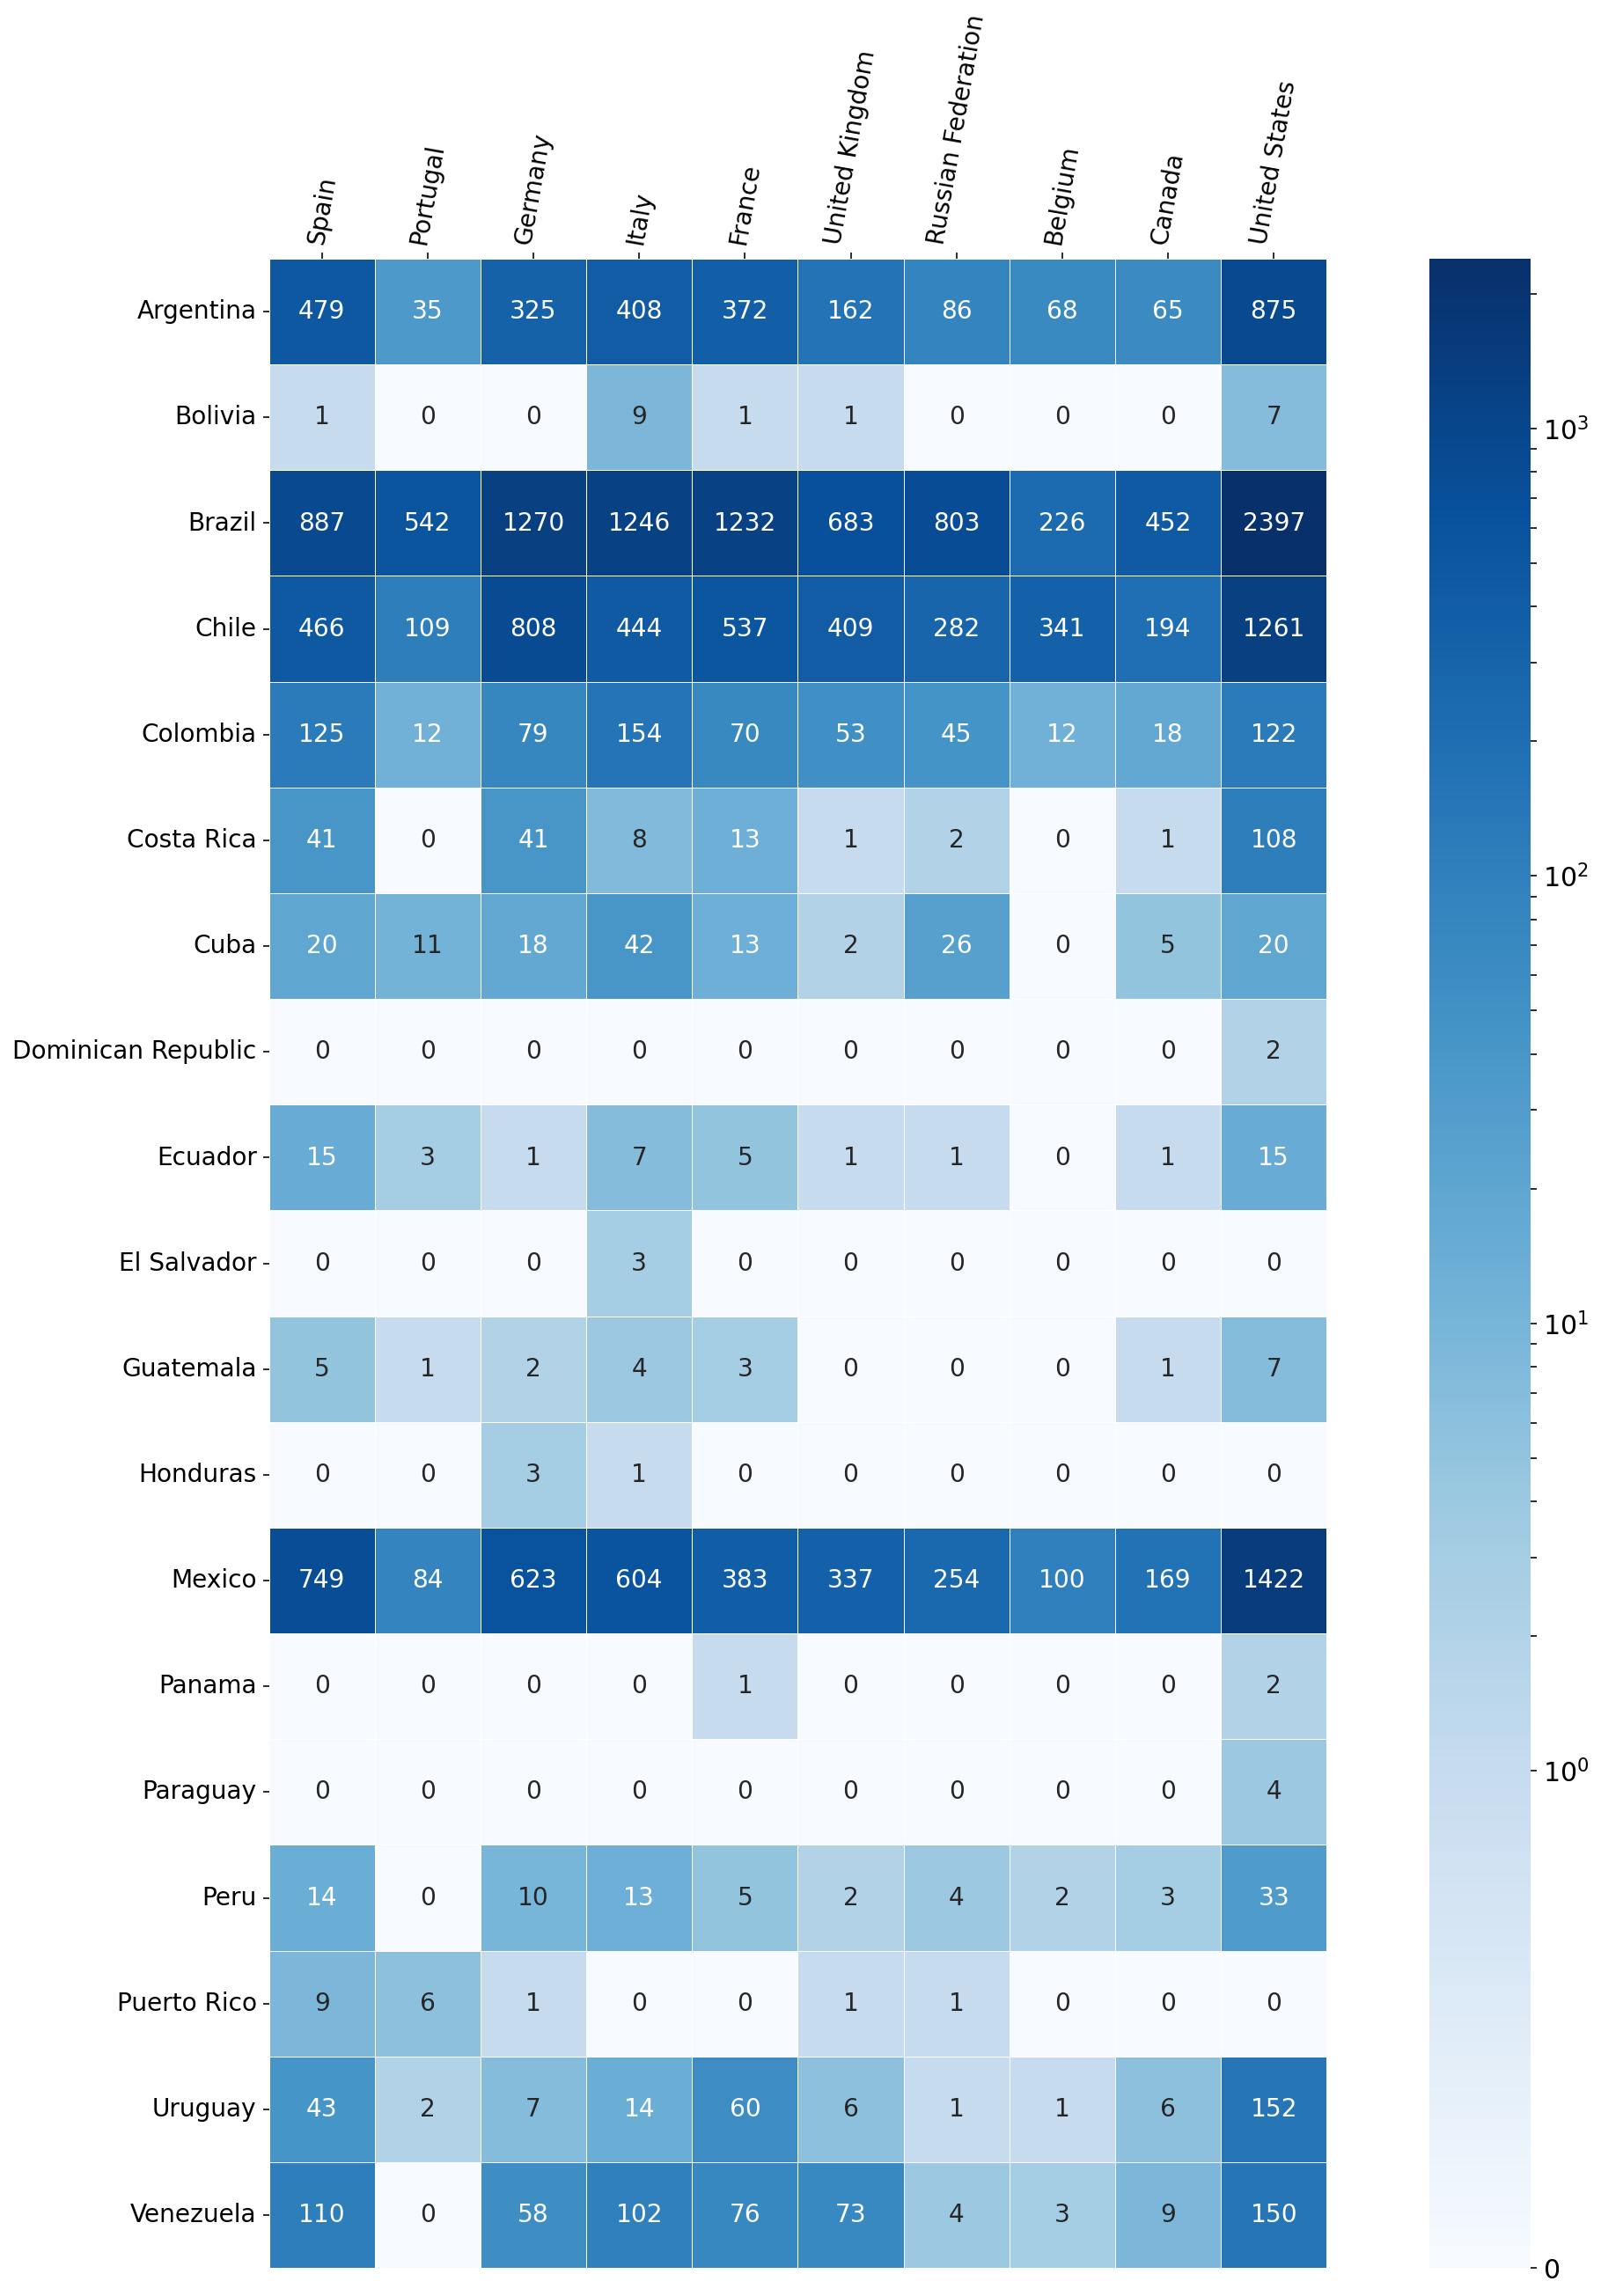

In [119]:
# Absolute value matrix
gen_collab_matrix_world_plot(collab_world_matrix, scale="symlog", name="collab_world_matrix")

In [120]:
all_papers = {}

for country in LA_countries:
    all_papers[country] = len(calculate_papers(country))

In [121]:
all_papers

{'Argentina': 5958,
 'Bolivia': 42,
 'Brazil': 24962,
 'Chile': 6396,
 'Colombia': 1582,
 'Costa Rica': 215,
 'Cuba': 393,
 'Dominican Republic': 5,
 'Ecuador': 117,
 'El Salvador': 6,
 'Guatemala': 32,
 'Honduras': 13,
 'Mexico': 10398,
 'Panama': 3,
 'Paraguay': 5,
 'Peru': 185,
 'Puerto Rico': 24,
 'Uruguay': 441,
 'Venezuela': 1047}

In [125]:
def normalised_shared_papers_world_matrix():
    """
    Generate a normalised matrix of shared papers where each row is divided by the
    total number of papers for the respective country (from all_papers), rounded to two decimal places.
    
    Returns:
        list of lists: A matrix where each cell in a row is the normalised value of shared papers for that country.
    """
    # Get the unnormalised collaboration matrix
    collab_world_matrix = shared_papers_world_matrix()
    
    # Normalise each row based on all_papers count for each country
    normalised_matrix = []
    for i, country in enumerate(LA_countries):
        total_papers = all_papers.get(country, 1)  # Avoid division by zero
        # Normalise and round to two decimal places
        normalised_row = [round((value / total_papers) * 100, 1) if total_papers > 0 else 0 for value in collab_world_matrix[i]]
        normalised_matrix.append(normalised_row)
    
    return normalised_matrix



In [126]:
normalised_collab_world_matrix = normalised_shared_papers_world_matrix()

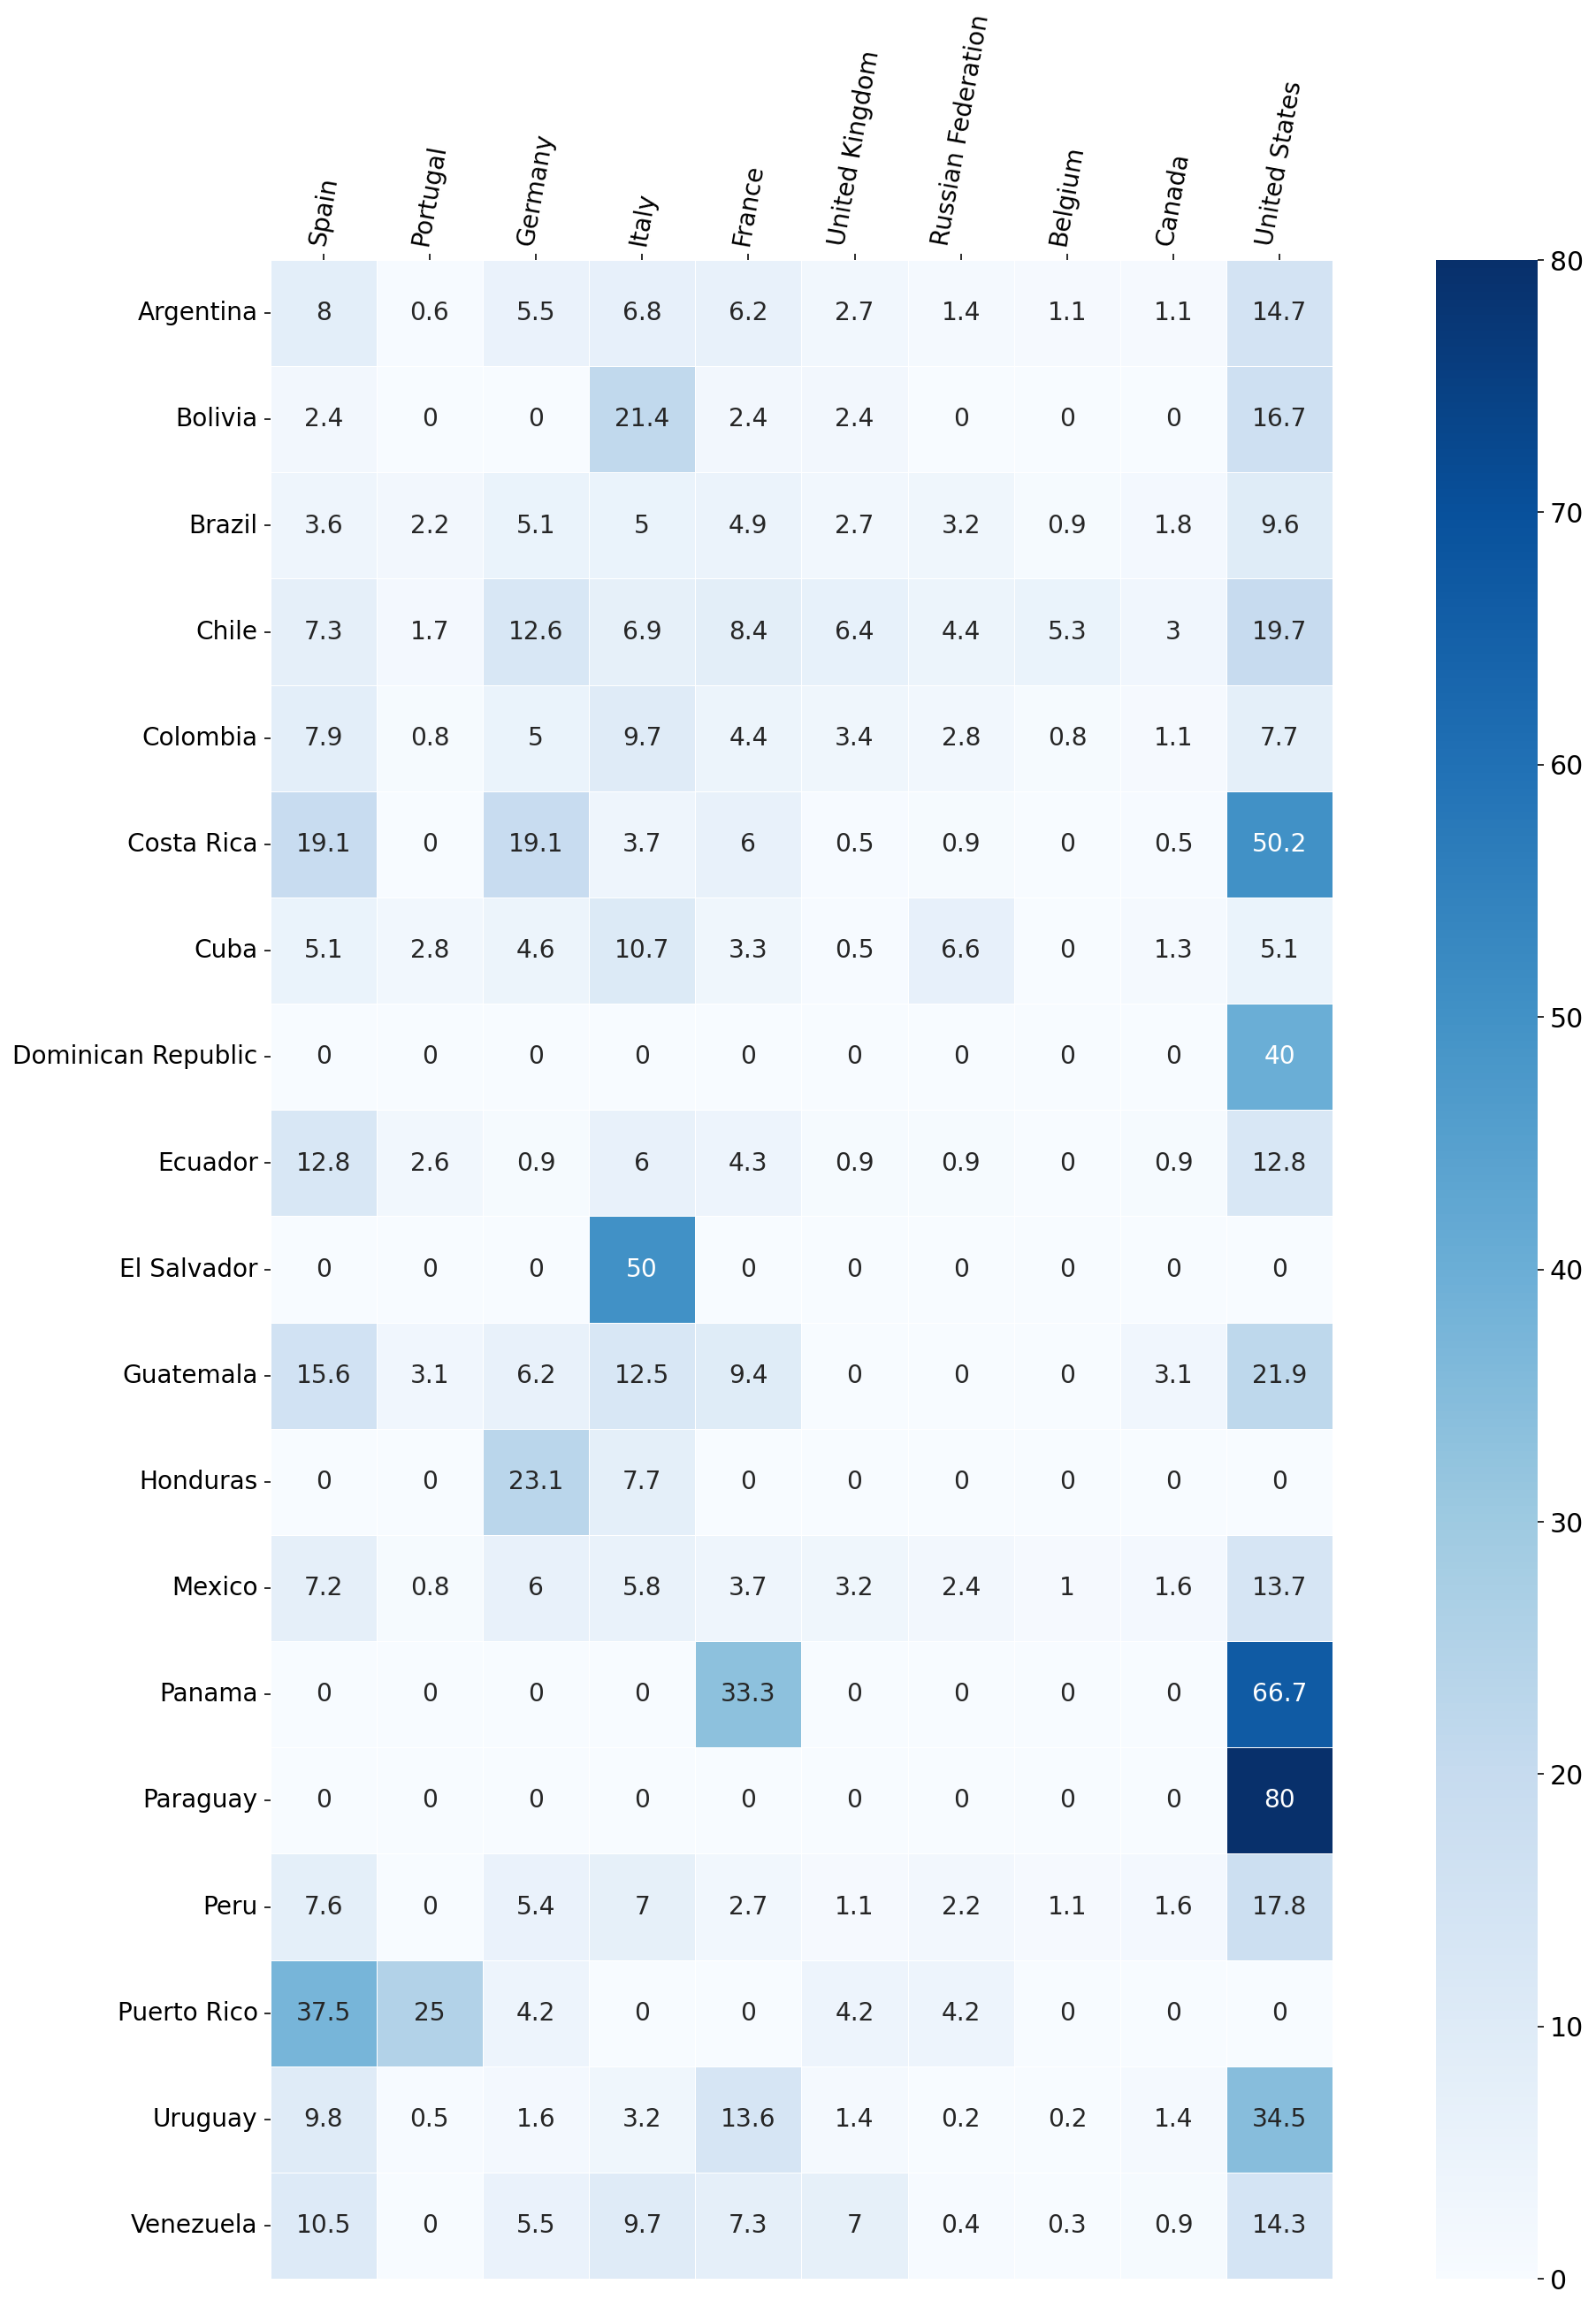

In [127]:
# Absolute value matrix
gen_collab_matrix_world_plot(normalised_collab_world_matrix, scale='linear', name="normalised_collab_world_matrix")